<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#unfreeze,-with-pooler,-limit-30000" data-toc-modified-id="unfreeze,-with-pooler,-limit-30000-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>unfreeze, with pooler, limit 30000</a></span></li><li><span><a href="#unfreeze,-without-pooler,-limit-30000" data-toc-modified-id="unfreeze,-without-pooler,-limit-30000-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>unfreeze, without pooler, limit 30000</a></span></li><li><span><a href="#freeze-6,-without-pooler,-limit-30000" data-toc-modified-id="freeze-6,-without-pooler,-limit-30000-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>freeze 6, without pooler, limit 30000</a></span></li></ul></div>

In [ ]:
%run ./multitask_style_learning_utils.ipynb

# unfreeze, with pooler, limit 30000

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


  0%|          | 0/14070 [00:00<?, ?it/s]

  0%|          | 0/2814 [00:00<?, ?it/s]

  0%|          | 0/1130 [00:00<?, ?it/s]

  0%|          | 0/2814 [00:00<?, ?it/s]

  0%|          | 0/1130 [00:00<?, ?it/s]

  0%|          | 0/2814 [00:00<?, ?it/s]

  0%|          | 0/1130 [00:00<?, ?it/s]

  0%|          | 0/2814 [00:00<?, ?it/s]

  0%|          | 0/1130 [00:00<?, ?it/s]

  0%|          | 0/2814 [00:00<?, ?it/s]

  0%|          | 0/1130 [00:00<?, ?it/s]

,i_epoch,train_loss,train_loss_PASTEL_country,train_loss_SARC,train_loss_ShortHumor,train_acc,train_acc_PASTEL_country,train_acc_SARC,train_acc_ShortHumor,val_loss,val_loss_PASTEL_country,val_loss_SARC,val_loss_ShortHumor,val_acc,val_acc_PASTEL_country,val_acc_SARC,val_acc_ShortHumor
0,0.0,0.686835,0.083892,0.531599,0.071344,0.905733,0.979000,0.752633,0.985567,0.849927,0.107127,0.602664,0.140136,0.721967,0.976403,0.671400,0.954110
1,1.0,0.366578,0.038614,0.318829,0.009135,0.956200,0.987900,0.883300,0.997400,0.888227,0.112609,0.623214,0.152404,0.730546,0.976884,0.681900,0.950580
2,2.0,0.153018,0.013437,0.137022,0.002560,0.982900,0.996333,0.952933,0.999433,1.210293,0.127804,0.889921,0.192568,0.725371,0.973995,0.675733,0.955623
3,3.0,0.058494,0.004139,0.053125,0.001229,0.993800,0.998767,0.982867,0.999767,1.631404,0.165148,1.261165,0.205091,0.725260,0.974958,0.675567,0.954110
4,4.0,0.024736,0.001617,0.022539,0.000580,0.997678,0.999700,0.993433,0.999900,1.732807,0.176312,1.339046,0.217449,0.723600,0.973513,0.673800,0.953606


Iteration:   0%|          | 0/1130 [00:00<?, ?it/s]

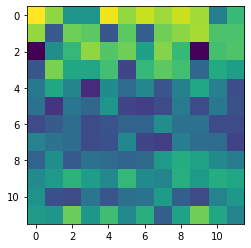

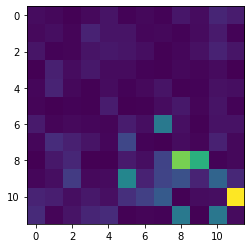

In [ ]:
selected_tasks = ['PASTEL_country', # 33224
                  'SARC', # 205645
#                   'SarcasmGhosh', # 39780
                  'ShortHumor', # 37801
#                   'ShortJokeKaggle', # 406682
#                   'ShortRomance', # 1902
#                   'TroFi', # 3335
#                   'VUA', # 15157
                 ] 
training_args = TrainingArgs(selected_tasks=selected_tasks,
                             base_model_name='bert-base-uncased',
                             freeze_bert=False,
                             use_pooler=True,
                             num_epoch=5,
                             data_limit=30000,
                            )

model = init_model(training_args)
freeze_model(model, training_args.freeze_bert)
df_evaluation, df_loss_per_step, model = train_model(model, training_args)

eval_dataloader = MultiTaskTestDataLoader(training_args, split='dev')
attn_entropy, head_importance, preds, labels = compute_heads_importance(model, eval_dataloader, training_args)

imshow(attn_entropy)
imshow(head_importance)


# unfreeze, without pooler, limit 30000

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


  0%|          | 0/14070 [00:00<?, ?it/s]

  0%|          | 0/2814 [00:00<?, ?it/s]

  0%|          | 0/1130 [00:00<?, ?it/s]

  0%|          | 0/2814 [00:00<?, ?it/s]

  0%|          | 0/1130 [00:00<?, ?it/s]

  0%|          | 0/2814 [00:00<?, ?it/s]

  0%|          | 0/1130 [00:00<?, ?it/s]

  0%|          | 0/2814 [00:00<?, ?it/s]

  0%|          | 0/1130 [00:00<?, ?it/s]

  0%|          | 0/2814 [00:00<?, ?it/s]

  0%|          | 0/1130 [00:00<?, ?it/s]

,i_epoch,train_loss,train_loss_PASTEL_country,train_loss_SARC,train_loss_ShortHumor,train_acc,train_acc_PASTEL_country,train_acc_SARC,train_acc_ShortHumor,val_loss,val_loss_PASTEL_country,val_loss_SARC,val_loss_ShortHumor,val_acc,val_acc_PASTEL_country,val_acc_SARC,val_acc_ShortHumor
0,0.0,0.618969,0.077523,0.489774,0.051672,0.916656,0.979033,0.786367,0.984567,0.824371,0.099392,0.586945,0.138035,0.736523,0.976403,0.689100,0.951589
1,1.0,0.308679,0.042283,0.249061,0.017336,0.961667,0.987300,0.903633,0.994067,1.048600,0.109557,0.707261,0.231781,0.731985,0.973272,0.684567,0.944024
2,2.0,0.129702,0.009704,0.117767,0.002232,0.984278,0.996933,0.956467,0.999433,1.337599,0.144359,1.001102,0.192137,0.730020,0.973754,0.681400,0.955119
3,3.0,0.043874,0.004764,0.037361,0.001749,0.995433,0.998833,0.987967,0.999500,1.622072,0.163732,1.220888,0.237453,0.726921,0.971346,0.678300,0.950580
4,4.0,0.017129,0.001425,0.015138,0.000566,0.998278,0.999800,0.995100,0.999933,1.801403,0.177012,1.415681,0.208710,0.728692,0.973754,0.679667,0.957136


Iteration:   0%|          | 0/1130 [00:00<?, ?it/s]

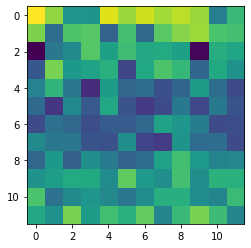

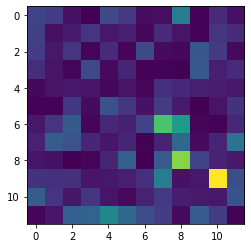

In [ ]:
selected_tasks = ['PASTEL_country', # 33224
                  'SARC', # 205645
#                   'SarcasmGhosh', # 39780
                  'ShortHumor', # 37801
#                   'ShortJokeKaggle', # 406682
#                   'ShortRomance', # 1902
#                   'TroFi', # 3335
#                   'VUA', # 15157
                 ] 
training_args = TrainingArgs(selected_tasks=selected_tasks,
                             base_model_name='bert-base-uncased',
                             freeze_bert=False,
                             use_pooler=False,
                             num_epoch=5,
                             data_limit=30000,
                            )

model = init_model(training_args)
freeze_model(model, training_args.freeze_bert)
df_evaluation, df_loss_per_step, model = train_model(model, training_args)

eval_dataloader = MultiTaskTestDataLoader(training_args, split='dev')
attn_entropy, head_importance, preds, labels = compute_heads_importance(model, eval_dataloader, training_args)

imshow(attn_entropy)
imshow(head_importance)


# freeze 6, without pooler, limit 30000

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


  0%|          | 0/14070 [00:00<?, ?it/s]

  0%|          | 0/2814 [00:00<?, ?it/s]

  0%|          | 0/1130 [00:00<?, ?it/s]

  0%|          | 0/2814 [00:00<?, ?it/s]

  0%|          | 0/1130 [00:00<?, ?it/s]

  0%|          | 0/2814 [00:00<?, ?it/s]

  0%|          | 0/1130 [00:00<?, ?it/s]

  0%|          | 0/2814 [00:00<?, ?it/s]

  0%|          | 0/1130 [00:00<?, ?it/s]

  0%|          | 0/2814 [00:00<?, ?it/s]

  0%|          | 0/1130 [00:00<?, ?it/s]

,i_epoch,train_loss,train_loss_PASTEL_country,train_loss_SARC,train_loss_ShortHumor,train_acc,train_acc_PASTEL_country,train_acc_SARC,train_acc_ShortHumor,val_loss,val_loss_PASTEL_country,val_loss_SARC,val_loss_ShortHumor,val_acc,val_acc_PASTEL_country,val_acc_SARC,val_acc_ShortHumor
0,0.0,0.614119,0.075873,0.497105,0.041141,0.912944,0.979167,0.771400,0.988267,0.811337,0.099676,0.585552,0.126108,0.736495,0.976403,0.688900,0.954110
1,1.0,0.378735,0.044275,0.323839,0.010621,0.951200,0.985467,0.871200,0.996933,0.873292,0.107825,0.616286,0.149181,0.739706,0.976643,0.692667,0.955119
2,2.0,0.210085,0.015256,0.192249,0.002581,0.973333,0.995233,0.925467,0.999300,1.200318,0.132130,0.874341,0.193847,0.716709,0.975680,0.664933,0.957640
3,3.0,0.080849,0.006916,0.072218,0.001715,0.991744,0.998200,0.977467,0.999567,1.354491,0.138099,1.000589,0.215803,0.723517,0.972791,0.673633,0.956127
4,4.0,0.034511,0.001926,0.031920,0.000665,0.996622,0.999667,0.990333,0.999867,1.554561,0.161097,1.190707,0.202757,0.730380,0.975439,0.681300,0.959657


Iteration:   0%|          | 0/1130 [00:00<?, ?it/s]

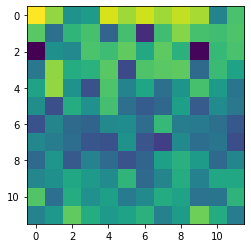

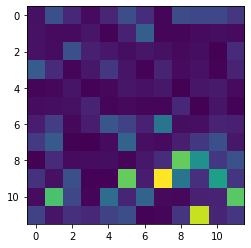

In [ ]:
selected_tasks = ['PASTEL_country', # 33224
                  'SARC', # 205645
#                   'SarcasmGhosh', # 39780
                  'ShortHumor', # 37801
#                   'ShortJokeKaggle', # 406682
#                   'ShortRomance', # 1902
#                   'TroFi', # 3335
#                   'VUA', # 15157
                 ] 
training_args = TrainingArgs(selected_tasks=selected_tasks,
                             base_model_name='bert-base-uncased',
                             freeze_bert=6,
                             use_pooler=False,
                             num_epoch=5,
                             data_limit=30000,
                            )

model = init_model(training_args)
freeze_model(model, training_args.freeze_bert)
df_evaluation, df_loss_per_step, model = train_model(model, training_args)

eval_dataloader = MultiTaskTestDataLoader(training_args, split='dev')
attn_entropy, head_importance, preds, labels = compute_heads_importance(model, eval_dataloader, training_args)

imshow(attn_entropy)
imshow(head_importance)
